In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df=pd.read_csv("C:\\Users\\admin\\Downloads\\iris_data.csv")

In [64]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
df.shape

(150, 6)

In [68]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [70]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [74]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [76]:
df.duplicated().sum()

0

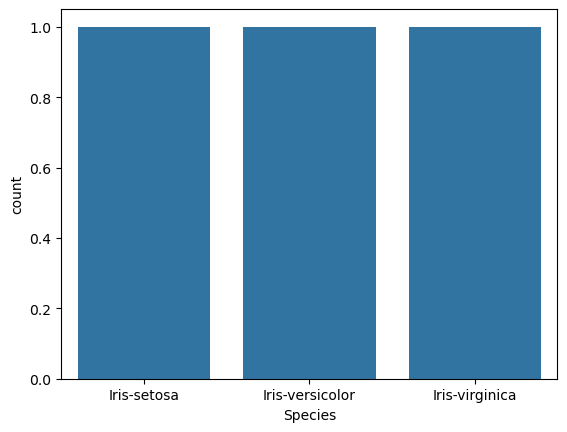

In [80]:
sns.countplot(df['Species'].value_counts())
plt.show()

In [84]:
df.drop(columns=['Id'],inplace=True)

In [86]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: >

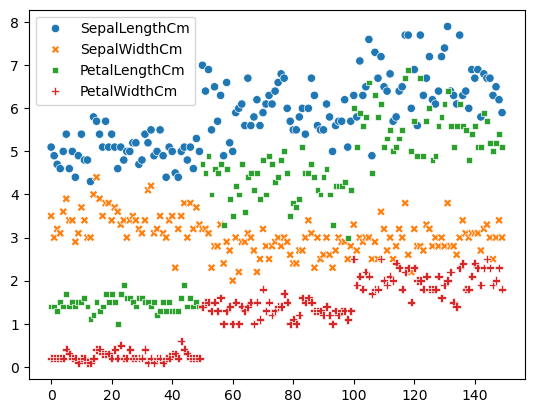

In [88]:
sns.scatterplot(df)

In [92]:
from sklearn.preprocessing import LabelEncoder

In [94]:
encoder=LabelEncoder()


In [98]:
df['Species']=encoder.fit_transform(df['Species'])

In [100]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


C:\Users\admin\AppData\Local\Temp\ipykernel_12512\1220131701.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PetalLengthCm'],kde=True)


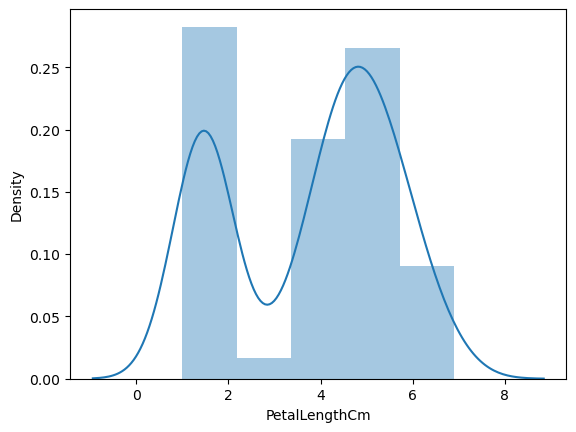

In [106]:
sns.distplot(df['PetalLengthCm'],kde=True)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_12512\3666008087.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PetalWidthCm'])


<Axes: xlabel='PetalWidthCm', ylabel='Density'>

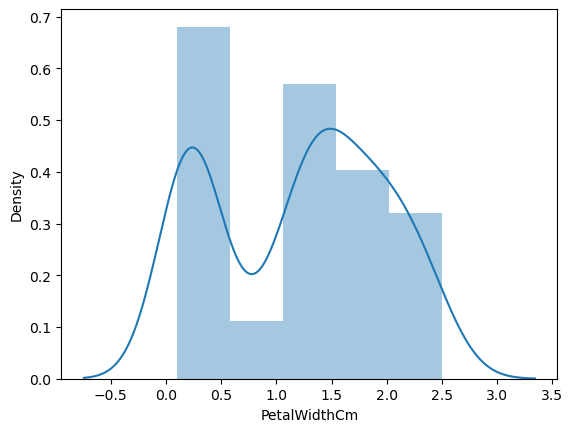

In [108]:
sns.distplot(df['PetalWidthCm'])

<Axes: >

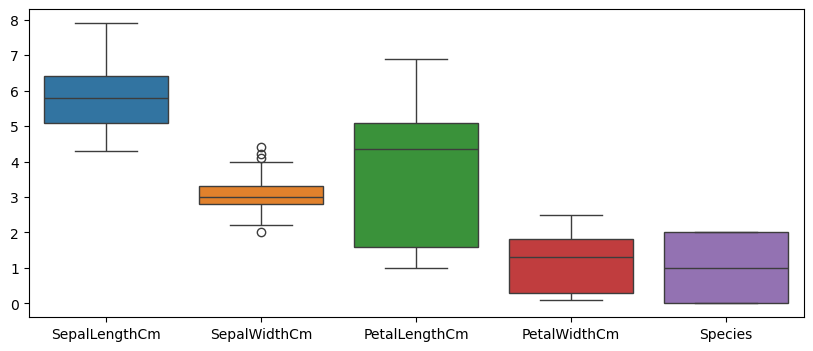

In [120]:
plt.figure(figsize=(10,4))
sns.boxplot(df)

In [116]:
# Detecting Outliers
def detecting_outliers(df):
    new_df=df.copy()
    dict={}
    for i in new_df.columns:
        q1=new_df[i].quantile(0.25)
        q3=new_df[i].quantile(0.75)
        iqr=q3-q1
        lower=q1-1.5*iqr
        upper=q3+1.5*iqr
        outliers=new_df[(new_df[i]<lower)|(new_df[i]>upper)][i].tolist()
        dict[i]=outliers
    return dict

In [118]:
detecting_outliers(df)

{'SepalLengthCm': [],
 'SepalWidthCm': [4.4, 4.1, 4.2, 2.0],
 'PetalLengthCm': [],
 'PetalWidthCm': [],
 'Species': []}

In [122]:
# Removing Outliers
def without_ouliers(df):
    new_df=df.copy()
    for i in new_df.columns:
        q1=new_df[i].quantile(0.25)
        q3=new_df[i].quantile(0.75)
        iqr=q3-q1
        lower=q1-1.5*iqr
        upper=q3+1.5*iqr
        new_df=new_df[(new_df[i]>lower) &(new_df[i]<upper)]
    return new_df

In [126]:
new_df=without_ouliers(df)

In [128]:
new_df.shape

(146, 5)

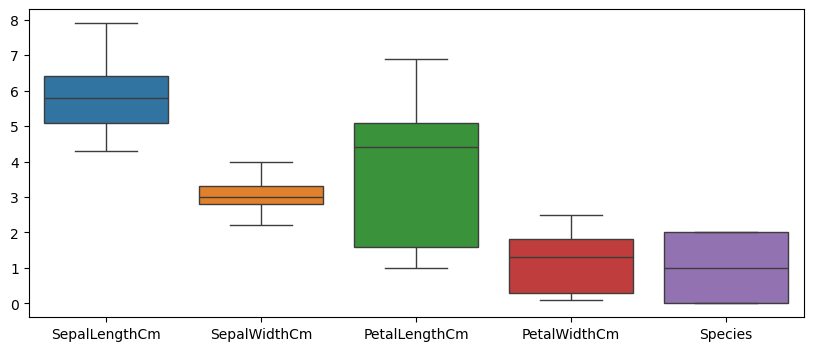

In [135]:
# Checking Outliers
plt.figure(figsize=(10,4))
sns.boxplot(new_df)
plt.show()

In [137]:
from sklearn.preprocessing import LabelEncoder

In [139]:
encoder=LabelEncoder()

In [151]:
new_df['Species']=encoder.fit_transform(new_df['Species'])

In [153]:
new_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.113977,0.879374,0.822577,0.788053
SepalWidthCm,-0.113977,1.000000,-0.397123,-0.329782,-0.397265
PetalLengthCm,0.879374,-0.397123,1.000000,0.961755,0.947469
PetalWidthCm,0.822577,-0.329782,0.961755,1.000000,0.955549
Species,0.788053,-0.397265,0.947469,0.955549,1.000000


In [155]:
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [157]:
new_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,5.856849,3.036986,3.807534,1.219863,1.020548
std,0.834093,0.395145,1.757117,0.760365,0.817643
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.000000,6.900000,2.500000,2.000000


In [169]:
x=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]

In [171]:
from sklearn.model_selection import train_test_split

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [175]:
# Normalization on Feature means train
from sklearn.preprocessing import StandardScaler

In [177]:
scaler=StandardScaler()

In [185]:
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.transform(x_test)

In [189]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [191]:
KNN=KNeighborsClassifier(n_neighbors=5)

In [193]:
KNN.fit(x_train_scale,y_train)

KNeighborsClassifier()

In [199]:
y_pred=KNN.predict(x_test_scale)
y_pred

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0], dtype=int64)

In [201]:
accuracy_score(y_pred,y_test)

0.9333333333333333

In [213]:
# applying Deiffernt Values of K
from sklearn.model_selection import cross_val_score
X=scaler.fit_transform(x)

In [219]:
k_vales=range(1,20)
accuracy_score=[]
for k in k_vales:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=5,scoring='accuracy')
    accuracy_score.append(scores.mean())
    

In [236]:
max(accuracy_score)

0.9588505747126437

Text(0, 0.5, 'accuracy_score')

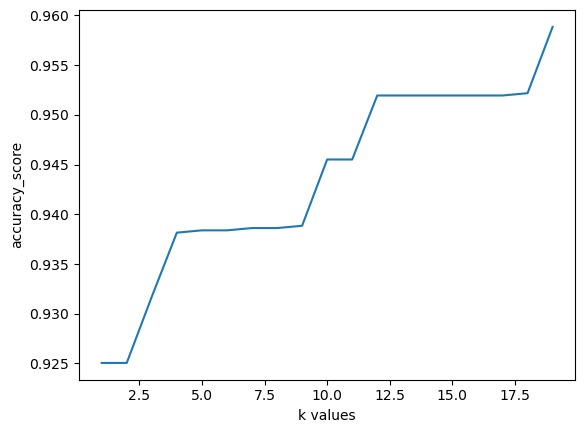

In [240]:
plt.plot(k_vales,accuracy_score)
plt.xlabel('k values')
plt.ylabel('accuracy_score')